In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

The move is
1. Move true and final feature engineering to new book
2. Consolidate EDA into single book
3. Separate modeling books

Should have:
1. ETL
2. EDA
3. Feature Engineering - Permanent
4. Modeling - Pure Regression
5. Modeling - Pure classification
6. Modeling - combination


Before going too much further, start write up and PPT now. (Google sheets later -- want quick viz)
May help focus in next phase, and will definitely nail down descriptive aspect

Find centroids on train, predict test centroids

Build function 2 ways to assess deltas between groups: 
1. cat, mean OR std, group a, group b, group c (multiclass)
2. Binary: cat, measure 1, measure 2, delta to class (other)

Remember to Standard SCale for comparison
Add: weekend day

Still haven't added weekday features

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)  
 2.1 [Pt 1 - Regression](#2.1-bullet)  
 2.2 [Pt 2 - Classification](#2.2-bullet)
3. [Basic Model](#3.0-bullet)  
 3.1 [Pt 1 - Regression](#3.1-bullet)  
 3.2 [Pt 2 - Classification](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

# Do not Run All cells - lots of charts

In [1]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
"""
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
df_main = pd.read_csv('./data/clean_data_nocomments_noviews_02.10.18.csv')

#create log features

In [3]:
df_main['view_log'] = df_main['viewCount'].map(lambda x: 0 if x==0 else np.log10(x)) #Which log to use???
df_main['comment_log'] = df_main['commentCount'].map(lambda x: 0 if x==0 else np.log10(x))
df_main['like_log'] = df_main['likeCount'].map(lambda x: 0 if x==0 else np.log10(x))
df_main['dislike_log'] = df_main['dislikeCount'].map(lambda x: 0 if x==0 else np.log10(x))


df_main.publishedAt = pd.to_datetime(df_main.publishedAt)
df_main['week'] = df_main.publishedAt.map(lambda x: x.week)

df_main.description.fillna('', inplace=True)

df_main.tags.fillna('', inplace=True)

In [1]:
Run_Text_Analysis = False

# <a class="anchor" id="2.0-bullet"> 2. Feature Engineering</a>

* Description
 * Sentiment
 * CVEC x
 * Overall word count
* Tags
 * Sentiment
 * CVEC
 * Num tags
* Title
 * Sentiment
 * CVEC predictions
 * feat / ft. 
 * Which letters
 * Length
* Measures
 * Log features
  * commentCount, 
  * dislikeCount, 
  * favoriteCount, 
  * likeCount
  * viewCount: view_log


## <a class="anchor" id="2.1-bullet">2.1 Adding Features</a>



### Description
 * Sentiment description_sentiment
 * Overall word count description_wordcount
 * CVEC matrix

### Tags
 * Sentiment
 * CVEC
 * Num tags

### Title
 * Sentiment
 * Wordcount
 * CVEC predictions
 * feat / ft. 
 * Which letters
 * Length

Look at f go!

### Other

## <a class="anchor" id="2.2-bullet">2.2 Classification</a>



# <a class="anchor" id="3.0-bullet"> 3. Basic Model</a>

In [26]:
cols_exclude = ['letter_search', 'request_token', 'channelTitle', 'defaultLanguage', 'description', 'tags', 
               'title', 'vidId', 
               'month', 'publishedAt', 
               'viewCount','view_log','view_class', 'commentCount', 'favoriteCount', 'dislikeCount', 'likeCount']
cols_include_initial = [col for col in df_main.columns if col not in cols_exclude]
cols_include_final = [col for col in df_main.columns if col not in cols_exclude ]#and col not in others_to_exclude
X = df_main.loc[:, cols_include_final]
y = df_main.view_class

## <a class="anchor" id="3.1-bullet">3.1 Unsupervised Learning</a>



In [27]:
from sklearn.cluster import DBSCAN, KMeans

In [28]:
from sklearn.metrics import silhouette_score

In [146]:
for n in range(10, 61, 5):
    classifier = KMeans(n_clusters=n)
    classifier.fit_predict(X=df_classified)
    print('   n: ', n, ' score: ', classifier.inertia_)


   n:  10  score:  323735.0154664527
   n:  15  score:  304300.95188746974
   n:  20  score:  289835.56074752053
   n:  25  score:  281633.9412256931
   n:  30  score:  274818.29518382373
   n:  35  score:  268994.23680192244
   n:  40  score:  264631.0371473209
   n:  45  score:  260375.46011602212
   n:  50  score:  256977.50355105224
   n:  55  score:  253389.46560993863
   n:  60  score:  250997.27975188356


In [171]:
for i in range(30, 50):
    df_classified = pd.DataFrame(StandardScaler().fit_transform(X)).join(y)
    classifier = KMeans(n_clusters=20, random_state=i)
    df_classified = df_main.join(pd.DataFrame(pd.Series(classifier.fit_predict(X=df_clssified)), columns=['kclass']))
    print('    i: ', i, ' max: ', df_classified.loc[:, ['kclass', 'view_log']].groupby('kclass').mean().max())

    i:  30  max:  view_log    7.337068
dtype: float64
    i:  31  max:  view_log    7.351191
dtype: float64
    i:  32  max:  view_log    7.349823
dtype: float64
    i:  33  max:  view_log    7.39974
dtype: float64
    i:  34  max:  view_log    7.347003
dtype: float64
    i:  35  max:  view_log    7.372282
dtype: float64
    i:  36  max:  view_log    7.508084
dtype: float64
    i:  37  max:  view_log    7.35118
dtype: float64
    i:  38  max:  view_log    7.326899
dtype: float64
    i:  39  max:  view_log    7.350033
dtype: float64
    i:  40  max:  view_log    7.350779
dtype: float64
    i:  41  max:  view_log    7.510703
dtype: float64
    i:  42  max:  view_log    7.33851
dtype: float64
    i:  43  max:  view_log    7.341986
dtype: float64
    i:  44  max:  view_log    7.327781
dtype: float64
    i:  45  max:  view_log    7.514125
dtype: float64
    i:  46  max:  view_log    7.357322
dtype: float64
    i:  47  max:  view_log    7.342221
dtype: float64
    i:  48  max:  view_log    7

In [169]:
df_classified[df_classified.title.str.contains('Despacito')].loc[:, ['title', 'viewCount', 'kclass']]

,title,viewCount,kclass
3270,Luis Fonsi - Despacito ( cover by J.Fla ),127411039,1
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,1
7594,"Luis Fonsi, Daddy Yankee - Despacito (Remix Au...",633857377,13


It looks like the cutoff should be somewhere around 7.4 for view log

In [174]:
df_main[df_main.view_log>7.5].shape

(1799, 63)

In [177]:
df_main.iloc[0:1, :].loc[:, ['view_log', 'viewCount']]

,view_log,viewCount
0,6.571227,3725863


In [178]:
10**6.571227

3725864.013677085

## <a class="anchor" id="3.2-bullet">3.2 Classification</a>



### 3.2.1 Classification - Basic Basic

In [148]:
X_train, X_test, y_train, y_test=train_test_split(X, y)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = GradientBoostingClassifier()
model.fit(X_train_sc, y_train)

preds = model.predict(X_test_sc)

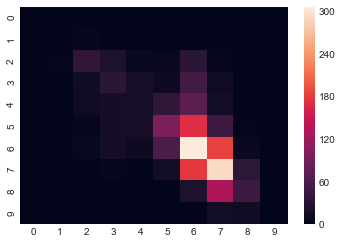

In [150]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(pd.DataFrame(cm))

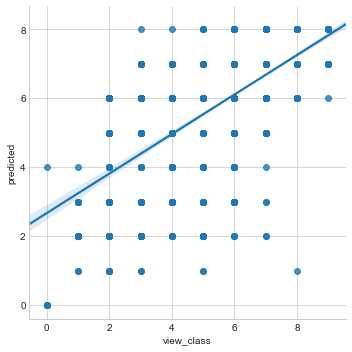

In [30]:
df_residuals = pd.DataFrame(y_test)
df_residuals['predicted'] = preds
df_residuals['residuals'] = df_residuals.predicted - df_residuals.view_class
sns.lmplot('view_class', 'predicted', data=df_residuals)

In [31]:
r2_score(df_residuals.view_class, df_residuals.predicted)

0.40591238461227497

In [29]:
df_big = df_main[df_main.viewCount > 100000000]
df_big_ss = ss.transform(df_big.loc[:, cols_include_initial])

df_big['predicted'] = 10**model.predict(df_big_ss)

#df_big.viewCount = df_big.viewCount.map(lambda x: '{:.6g}'.format(x))

df_big.loc[:, ['title', 'viewCount', 'predicted']].sort_values(by='viewCount', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,viewCount,predicted
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,100000000
4268,Ed Sheeran - Shape of You [Official Video],3827104659,10000000
7190,Wiz Khalifa - See You Again ft. Charlie Puth [...,3788737518,10000000
5540,Mark Ronson - Uptown Funk ft. Bruno Mars,3256917992,100000000
3634,PSY - GANGNAM STYLE(강남스타일) M/V,3218413082,10000000
569,Justin Bieber - Sorry (PURPOSE : The Movement),3014897224,1000000000
7417,Maroon 5 - Sugar,2756205542,1000000000
7514,Taylor Swift - Shake It Off,2650920924,100000000
5506,Katy Perry - Roar (Official),2638406673,100000000
627,Enrique Iglesias - Bailando (Español) ft. Desc...,2582945265,1000000000


## <a class="anchor" id="3.2-bullet">3.2 KCLass binary</a>



In [62]:
y=1*(df_main.view_log>7.5)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=25)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [63]:
paramz = {
    'max_depth':[7, 10, 12], 
    'max_features':[.5, .7, .9]
}
gs = GridSearchCV(GradientBoostingClassifier(), param_grid=paramz)
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 10, 12], 'max_features': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
preds = gs.predict_proba(X_test_sc)
print('    accuracy: ', gs.score(X_test_sc, y_test), 'roc: ', roc_auc_score(y_test, [element[1] for element in preds]))
gs.best_params_

    accuracy:  0.8445262189512419 roc:  0.8679617564489644


{'max_depth': 7, 'max_features': 0.5}

In [ ]:
model = GradientBoostingClassifier(subsample=.9, max_depth=10)
model.fit(X_train_sc, y_train)

preds = model.predict_proba(X_test_sc)
print('    accuracy: ', model.score(X_test_sc, y_test), 'roc: ', roc_auc_score(y_test, [element[1] for element in preds]))

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test_sc))
pd.DataFrame(cm)

## <a class="anchor" id="3.3-bullet">3.3 Neural Net</a>



In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [34]:
X = df_main.loc[:, cols_include_initial]

In [38]:
#for state in range(5, 56, 10):
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [39]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [50]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = Sequential()
#this does input and first activation
model.add(Dense(X_train_sc.shape[1], activation='relu', input_dim=X_train_sc.shape[1]))
model.add(Dropout(.5))
#model.add(Dense(20, activation='relu'))
#model.add(Dropout(.5))
#model.add(Dense(10, activation='relu'))

model.add(Dense(y_train_cat.shape[1], activation='softmax')) #1 neuron
model.compile(loss='categorical_crossentropy', optimizer='adam')

history = model.fit(X_train_sc, y_train_cat, validation_data=(X_test_sc, y_test_cat), epochs=40, verbose=0)
preds = model.predict(X_test_sc)
#print( 'score: ', r2_score(y_test, preds))

In [54]:
preds[0]

array([4.8751064e-10, 3.2303380e-08, 1.2714840e-03, 6.7004845e-02,
       2.9312417e-01, 3.0991632e-01, 2.6155320e-01, 6.7083307e-02,
       4.6626017e-05, 6.7871694e-11], dtype=float32)

In [58]:
preds_cat = []
for i in range(len(preds)):
    preds_cat.append(list(preds[i]).index(max(preds[i])))

In [65]:
len(preds_cat)

2174

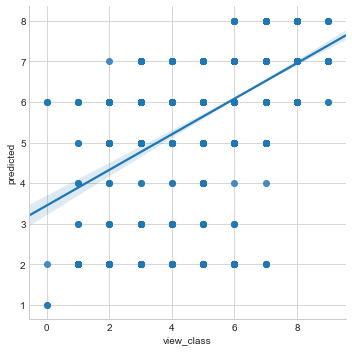

In [80]:
sns.lmplot('view_class', 'predicted', data=temp)

In [79]:
temp.columns

Index(['view_class', 'predicted'], dtype='object')

In [78]:
temp = pd.DataFrame([y_test]).T.reset_index().drop('index', axis=1)
temp['predicted'] = preds_cat

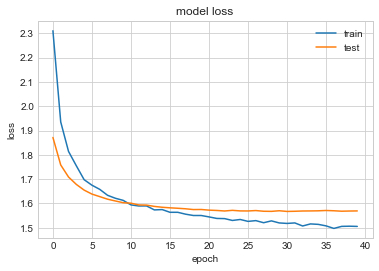

In [53]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

In [55]:
#Save point 1
#df_new.to_csv('./data/alphabet_pull_init_01.10.18.csv', index=False)

In [ ]:
#nope: AdaBoostRegressor, 

## <a class="anchor" id="3.2-bullet">3.2 Interpretation and Advanced Cleaning</a>


# <a class="anchor" id="4.0-bullet"> 4.0 Reference and Planning</a>

In [ ]:
# all views over 400M https://www.youtube.com/playlist?list=PLirAqAtl_h2r5g8xGajEwdXd3x1sZh8hC

Are there bots? would explain difference in like / view ratio.

### Next Steps
Feature engineering
* NLP - check only most 1000 common words according to corpus string (or above threshold) xx
* Comments / likes to views ratio? x
* Duration group classifications instead of just duration (eh)

Classification
* Do breakpoints by order of magnitude? That's sort of where this started. By analyzing differences, can establish if/then statements
* Find k classifications


## Columns Decisions
* Convert 
 * Duration x
 * PublishedAt X
* Get dummies: 
 * definition, (0 for sd, 1 for hd)
 * licensedContent (map)
 * Caption (map)
* Drop:
 * Projection, 
 * Dimension
 * 3d movies,
 * livebroadcast
 * CategoryID
 * channelID (already have title, which has text!!)
 * LiveBroadCastContent
* Leave in for EDA, but anticipate dropping during most analysis (basically stuff that might be interesting)
 * Region restriction should be dropped until modeling - consider bringing this back later
 * ContentRating - insignificant but interesting
 * Could look at channelTitle
 * request_token
 * letter_search
 * defaultLanguage, (might be better as 1 / 0 for set / not set. leave for model)